In [1]:
|import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score, precision_score, roc_auc_score
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Activation
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder 

In [2]:
df = pd.read_csv('tcc.csv')
df.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [4]:
#Before EDA, save the original dataset by making a copy.

telco = df.copy()

In [5]:
#The churn column is what we are most interested in. A quick exploration to see what we are dealing with.
telco.churn.value_counts()

0    50438
1    49562
Name: churn, dtype: int64

The most common problem of churn dataset is imbalance. However, this seems to be balanced. I hope it has not previously undergone balancing techniques. That has a way of messing with the eventual outcome.

In [6]:
#The dataset has a 50:50 churned and loyal customers. Strange but acceptable.
#Unique Attribute Identification (%)
churn_counts = df['churn'].value_counts()
total = df['churn'].count()
Percentage = churn_counts/total *100
print(Percentage)

0    50.438
1    49.562
Name: churn, dtype: float64


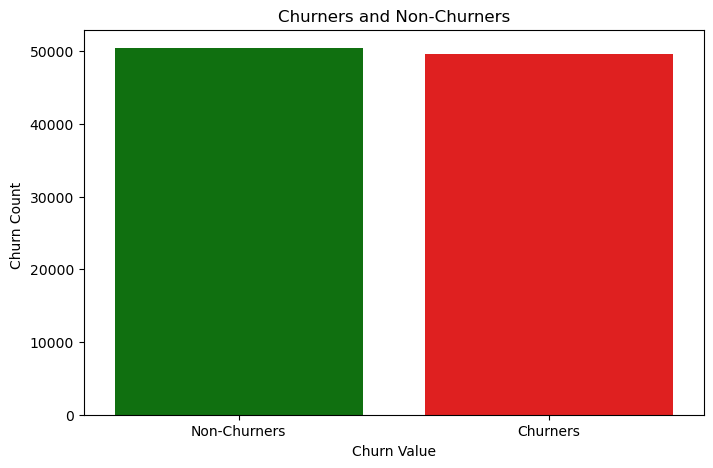

In [7]:
plt.figure(figsize=(8,5))
colors = ['green', 'red']
sns.barplot(x = churn_counts.index, y = churn_counts.values, palette = colors)
plt.xlabel('Churn Value')
plt.ylabel('Churn Count ')
plt.title('Churners and Non-Churners')
plt.xticks(churn_counts.index, ['Non-Churners', 'Churners'])
plt.show()

In [8]:
#I like to check if the columns i got conforms with my data dictionary, as well as teh consistency of the dataset and the data types I have to work with.
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [9]:
#Based on the datatypes, the dataset can be classified into numerical and catgeorical variables. This will make univariate and bivariate analysis possible.
#This is where the business understanding comes. What factors/features should influence churn?
#Separate dataset into numerical and categorical columns

num_telco = telco.select_dtypes(include = ['float', 'int64']) #numerical columns

cat_telco = telco.select_dtypes(include = ['object']) #Categorical columns



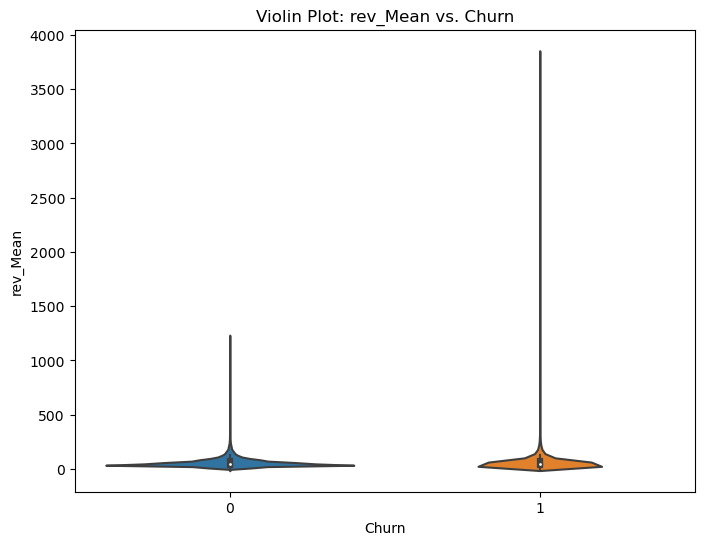

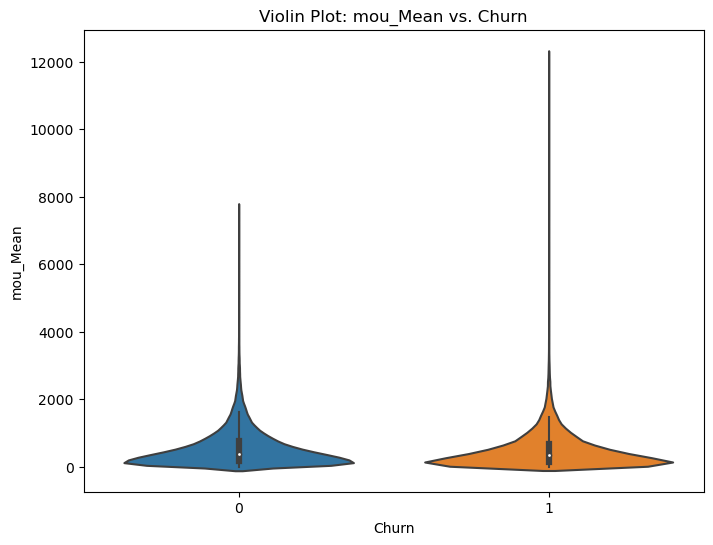

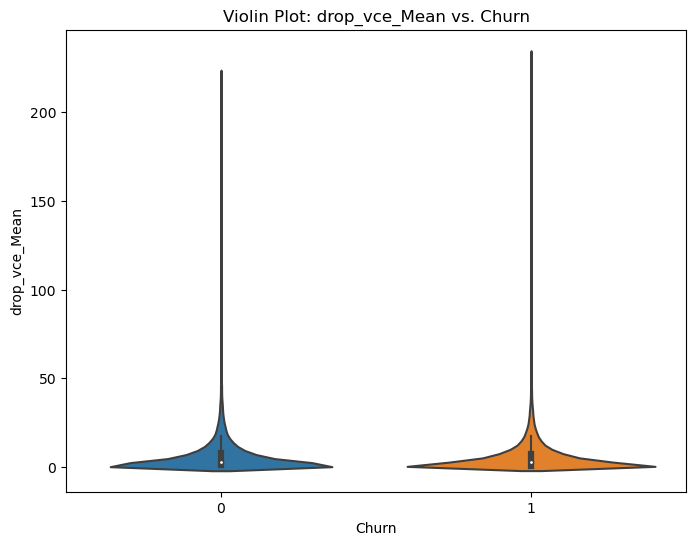

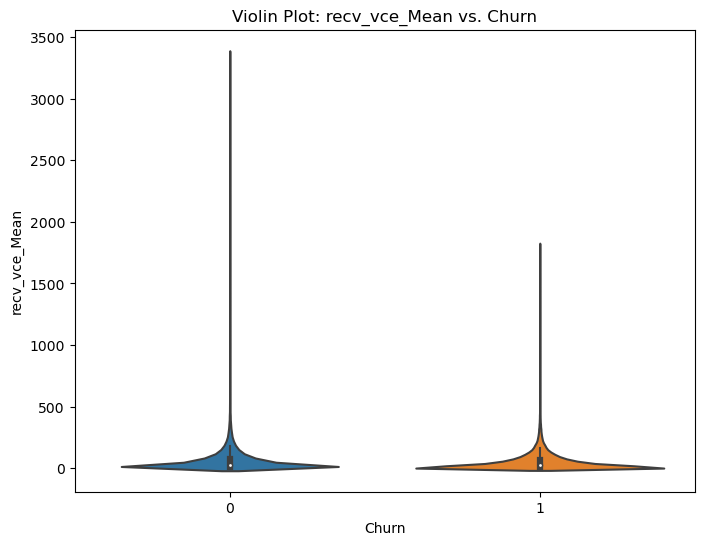

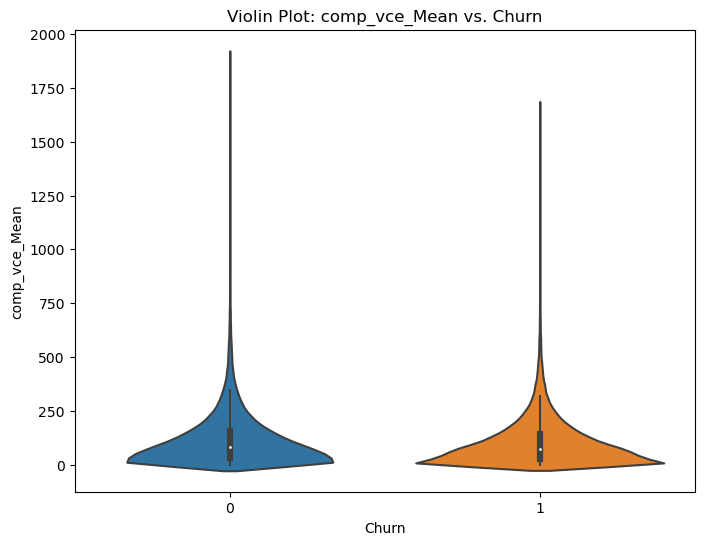

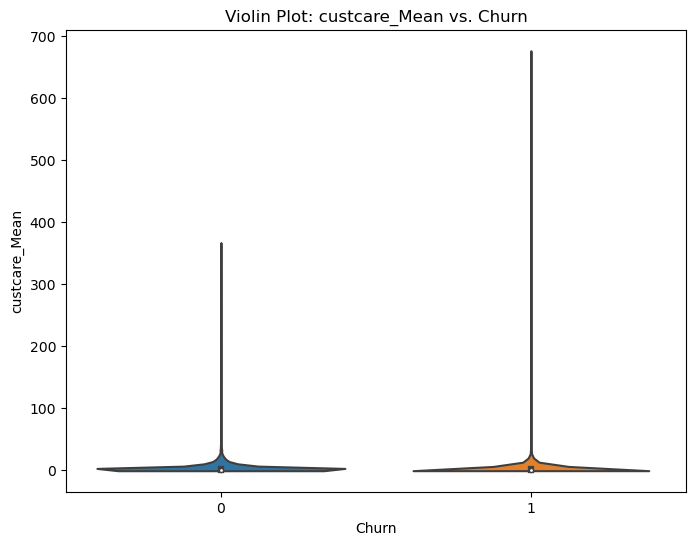

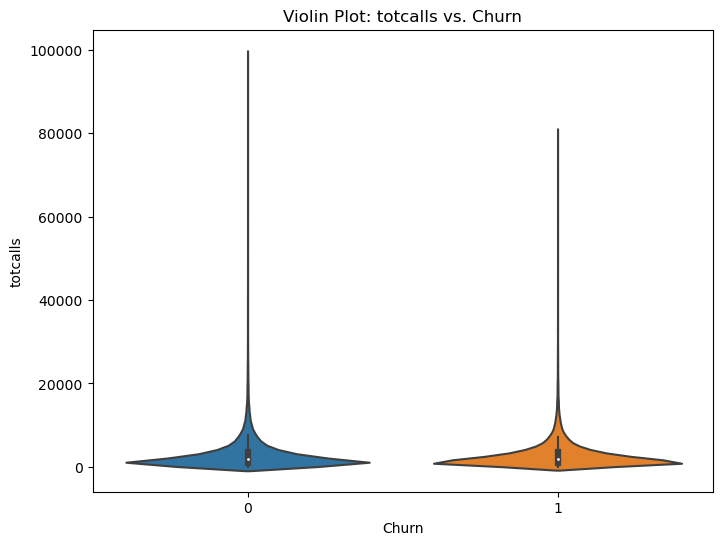

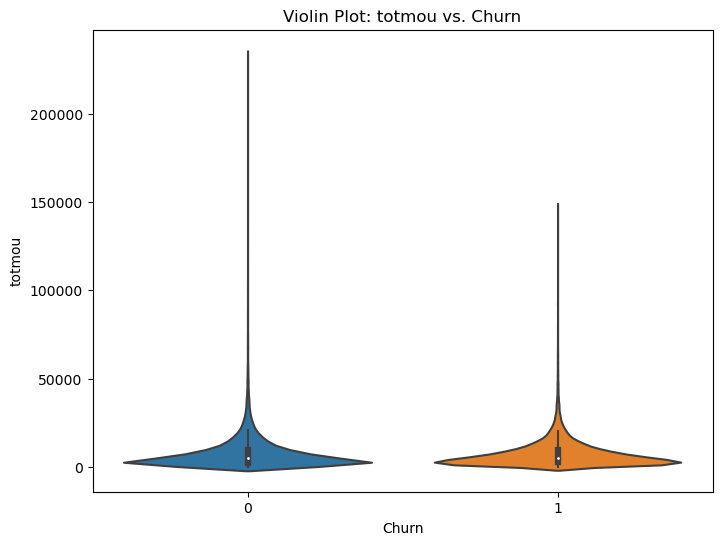

In [10]:
#using for loop to create a bivariate analysis of the churn. But firstly, i will zoom in on some of the most important numerical columns

bi_num_telco = ['rev_Mean', 'mou_Mean','drop_vce_Mean', 'recv_vce_Mean','comp_vce_Mean', 'custcare_Mean', 'totcalls', 'totmou' ]


for col in bi_num_telco:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='churn', y=col, data=num_telco)
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.title(f'Violin Plot: {col} vs. Churn')
    plt.show()


In [11]:
#After Visualisations, we can proceed to missing values. 
#How much house cleaning do we have to do? Remember we saw some columns with missing values initially.

telco.isna().sum().sort_values(ascending = False)/len(telco) * 100     #Percentage of missing values ranked

numbcars            49.366
dwllsize            38.308
HHstatin            37.923
ownrent             33.706
dwlltype            31.909
lor                 30.190
income              25.436
adults              23.019
infobase            22.079
hnd_webcap          10.189
prizm_social_one     7.388
avg6rev              2.839
avg6mou              2.839
avg6qty              2.839
ethnic               1.732
rv                   1.732
marital              1.732
forgntvl             1.732
kid0_2               1.732
kid3_5               1.732
kid6_10              1.732
kid16_17             1.732
creditcd             1.732
truck                1.732
kid11_15             1.732
change_rev           0.891
change_mou           0.891
hnd_price            0.847
mou_Mean             0.357
rev_Mean             0.357
da_Mean              0.357
datovr_Mean          0.357
totmrc_Mean          0.357
ovrmou_Mean          0.357
ovrrev_Mean          0.357
vceovr_Mean          0.357
roam_Mean            0.357
a

Text(0.5, 1.0, 'Top Ten Columns with Missing Values')

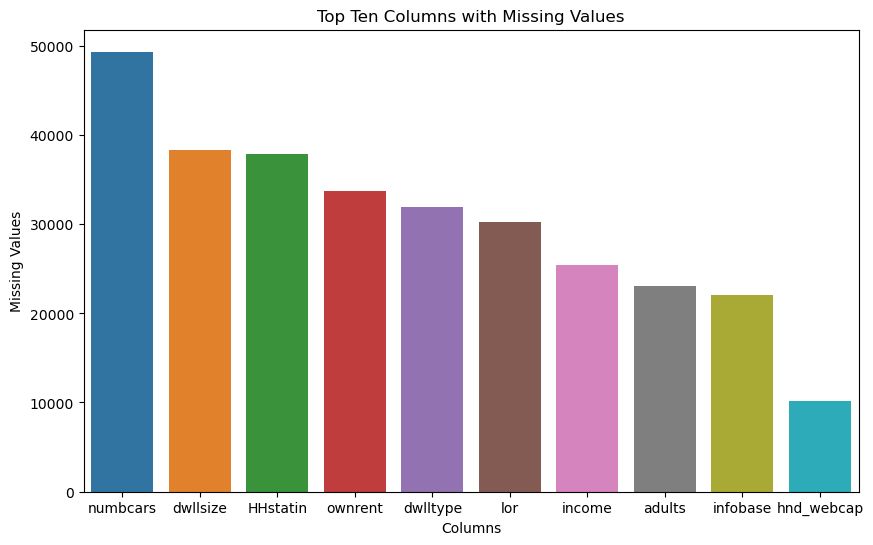

In [12]:
#To visualise the top columns with missing values

data = telco.isna().sum().sort_values (ascending = False)
top_10 = data.head(10)

plt.figure(figsize = (10, 6))
sns.barplot( x = top_10.index, y = top_10.values)
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.title('Top Ten Columns with Missing Values')

In [13]:
# I usually like to set a threshold for the missing values allowed in the dataset and the techniques i will use to handle them.
#Considering the importance of each variable and the number of missing values, i chose 8% as my threshold.

#Handling Missing Values with more than 8% missing values
telco.drop(columns=['numbcars', 'dwllsize', 'HHstatin', 'ownrent', 'dwlltype',
                   'lor', 'income', 'adults', 'infobase', 'hnd_webcap', 'prizm_social_one', 'ethnic'], inplace=True)



In [14]:
#columns has reduced from 100 to 89. We can proceed to handle missing values.
telco.shape

(100000, 88)

In [15]:
num_telco = telco.select_dtypes(include= ['int64', 'float64'])


cat_telco = telco.select_dtypes(include=['object'])


In [16]:
#Since the values are averages, the imputation method will be using the mean.

num_telco_imputed = num_telco.fillna(num_telco.mean())
num_telco_imputed.isna().sum()

rev_Mean           0
mou_Mean           0
totmrc_Mean        0
da_Mean            0
ovrmou_Mean        0
ovrrev_Mean        0
vceovr_Mean        0
datovr_Mean        0
roam_Mean          0
change_mou         0
change_rev         0
drop_vce_Mean      0
drop_dat_Mean      0
blck_vce_Mean      0
blck_dat_Mean      0
unan_vce_Mean      0
unan_dat_Mean      0
plcd_vce_Mean      0
plcd_dat_Mean      0
recv_vce_Mean      0
recv_sms_Mean      0
comp_vce_Mean      0
comp_dat_Mean      0
custcare_Mean      0
ccrndmou_Mean      0
cc_mou_Mean        0
inonemin_Mean      0
threeway_Mean      0
mou_cvce_Mean      0
mou_cdat_Mean      0
mou_rvce_Mean      0
owylis_vce_Mean    0
mouowylisv_Mean    0
iwylis_vce_Mean    0
mouiwylisv_Mean    0
peak_vce_Mean      0
peak_dat_Mean      0
mou_peav_Mean      0
mou_pead_Mean      0
opk_vce_Mean       0
opk_dat_Mean       0
mou_opkv_Mean      0
mou_opkd_Mean      0
drop_blk_Mean      0
attempt_Mean       0
complete_Mean      0
callfwdv_Mean      0
callwait_Mean

In [17]:
#The mode of the columns will be used for the categorical set.
cat_telco_imputed = cat_telco.apply(lambda col: col.fillna(col.mode()[0]))


In [18]:
cat_telco_imputed.isna().sum()

new_cell      0
crclscod      0
asl_flag      0
area          0
dualband      0
refurb_new    0
marital       0
kid0_2        0
kid3_5        0
kid6_10       0
kid11_15      0
kid16_17      0
creditcd      0
dtype: int64

In [19]:
#Handling outliers for the numerical columns
# Calculate the IQR and boundaries for outlier detection
import numpy as np

# Define the function for handling outliers
def handle_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    return data

# Specify the numeric columns for outlier handling
numeric_columns = num_telco_imputed.columns

# Handle outliers in numerical columns
num_telco_out = handle_outliers(num_telco_imputed.copy(), numeric_columns)


In [20]:
import numpy as np

# Define the function for handling outliers
def handle_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    return data

# Specify the numeric columns for outlier handling
numeric_columns = num_telco_imputed.columns

# Handle outliers in numerical columns
num_telco_out = handle_outliers(num_telco_imputed.copy(), numeric_columns)


In [21]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoder to ordinal categorical columns
ordinal_columns = ['crclscod', 'asl_flag', 'area', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17']
for col in ordinal_columns:
    cat_telco[col] = label_encoder.fit_transform(cat_telco[col])

# Apply One-Hot Encoder to nominal categorical columns
nominal_columns = ['new_cell', 'dualband', 'refurb_new', 'marital', 'creditcd']
cat_telco_encoded = pd.get_dummies(cat_telco, columns=nominal_columns, drop_first=True)


Telco = pd.concat([num_telco_imputed, cat_telco_encoded], axis=1)

In [22]:
Telco = pd.concat([num_telco_imputed, cat_telco_encoded], axis=1)


In [23]:
telcon = Telco.copy()
telcon.shape

(100000, 94)

In [24]:
# Feature engineering
kid_cols = ['kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17']
telcon['total_kid'] = telcon[kid_cols].sum(axis=1)

def safe_division(numerator, denominator):
    return np.where(denominator != 0, numerator / denominator, np.nan)

telcon['vce_blk_rate'] = safe_division(telcon['blck_vce_Mean'], telcon['plcd_vce_Mean'])
telcon['vce_drp_rate'] = safe_division(telcon['drop_vce_Mean'], telcon['plcd_vce_Mean'])
telcon['dat_blk_rate'] = safe_division(telcon['blck_dat_Mean'], telcon['plcd_dat_Mean'])
telcon['dat_drp_rate'] = safe_division(telcon['drop_dat_Mean'], telcon['plcd_dat_Mean'])
telcon['vce_cmpt_rate'] = safe_division(telcon['comp_vce_Mean'], telcon['plcd_vce_Mean'])
telcon['dat_cmpt_rate'] = safe_division(telcon['comp_dat_Mean'], telcon['plcd_dat_Mean'])
telcon['tot_cmpt_rate'] = safe_division(telcon['complete_Mean'], telcon['attempt_Mean'])
telcon['tot_drp_blk_rate'] = safe_division(telcon['drop_blk_Mean'], telcon['attempt_Mean'])
telcon['vce_dat_ratio'] = safe_division(telcon['plcd_vce_Mean'], telcon['plcd_vce_Mean'] + telcon['plcd_dat_Mean'])
telcon['diff_3mon_overall_mou'] = safe_division((telcon['avg3mou'] - telcon['avgmou']), telcon['avgmou'])
telcon['diff_3mon_overall_qty'] = safe_division((telcon['avg3qty'] - telcon['avgqty']), telcon['avgqty'])
telcon['diff_3mon_overall_rev'] = safe_division((telcon['avg3rev'] - telcon['avgrev']), telcon['avgrev'])
telcon['diff_6mon_overall_mou'] = safe_division((telcon['avg6mou'] - telcon['avgmou']), telcon['avgmou'])
telcon['diff_6mon_overall_qty'] = safe_division((telcon['avg6qty'] - telcon['avgqty']), telcon['avgqty'])
telcon['diff_6mon_overall_rev'] = safe_division((telcon['avg6rev'] - telcon['avgrev']), telcon['avgrev'])


The churn column was compared to some columns based on the influence they may have on the customer leaving the business. These columns represented usage patterns, network quality and engagemnet with customer care. It was observed that customers that enjoyed better usage and lesse calls to customer care did not churn and vice versa.


The data dictionary is presented as; 
1 rev_Mean: Mean monthly revenue (charge amount)
2 mou_Mean: Mean number of monthly minutes of use
3 totmrc_Mean: Mean total monthly recurring charge
4 da_Mean: Mean number of directory assisted calls
5 ovrmou_Mean: Mean overage minutes of use
6 ovrrev_Mean: Mean overage revenue
7 vceovr_Mean: Mean revenue of voice overage
8 datovr_Mean: Mean revenue of data overage
9 roam_Mean: Mean number of roaming calls
10 change_mou: Percentage change in monthly minutes of use vs previous three month average
11 change_rev: Percentage change in monthly revenue vs previous three month average
12 drop_vce_Mean: Mean number of dropped (failed) voice calls
13 drop_dat_Mean: Mean number of dropped (failed) data calls
14 blck_vce_Mean: Mean number of blocked (failed) voice calls
15 blck_dat_Mean: Mean number of blocked (failed) data calls
16 unan_vce_Mean: Mean number of unanswered voice calls
17 unan_dat_Mean: Mean number of unanswered data calls
18 plcd_vce_Mean: Mean number of attempted voice calls placed
19 plcd_dat_Mean: Mean number of attempted data calls placed
20 recv_vce_Mean: Mean number of received voice calls
21 recv_sms_Mean: Mean number of received SMS
22 comp_vce_Mean: Mean number of completed voice calls
23 comp_dat_Mean: Mean number of completed data calls
24 custcare_Mean: Mean number of customer care calls
25 ccrndmou_Mean: Mean rounded minutes of use of customer care calls
26 cc_mou_Mean: Mean unrounded minutes of use of customer care (see CUSTCARE_MEAN) calls
27 inonemin_Mean: Mean number of inbound calls less than one minute
28 threeway_Mean: Mean number of three way calls
29 mou_cvce_Mean: Mean unrounded minutes of use of completed voice calls
30 mou_cdat_Mean: Mean unrounded minutes of use of completed data calls
31 mou_rvce_Mean: Mean unrounded minutes of use of received voice calls
32 owylis_vce_Mean: Mean number of outbound wireless to wireless voice calls
33 mouowylisv_Mean: Mean unrounded minutes of use of outbound wireless to wireless voice calls
34 iwylis_vce_Mean: N
35 mouiwylisv_Mean: Mean unrounded minutes of use of inbound wireless to wireless voice calls
36 peak_vce_Mean: Mean number of inbound and outbound peak voice calls
37 peak_dat_Mean: Mean number of peak data calls
38 mou_peav_Mean: Mean unrounded minutes of use of peak voice calls
39 mou_pead_Mean: Mean unrounded minutes of use of peak data calls
40 opk_vce_Mean: Mean number of off-peak voice calls
41 opk_dat_Mean: Mean number of off-peak data calls
42 mou_opkv_Mean: Mean unrounded minutes of use of off-peak voice calls
43 mou_opkd_Mean: Mean unrounded minutes of use of off-peak data calls
44 drop_blk_Mean: Mean number of dropped or blocked calls
45 attempt_Mean: Mean number of attempted calls
46 complete_Mean: Mean number of completed calls
47 callfwdv_Mean: Mean number of call forwarding calls
48 callwait_Mean: Mean number of call waiting calls
49 churn: Instance of churn between 31-60 days after observation date
50 months: Total number of months in service
51 uniqsubs: Number of unique subscribers in the household
52 actvsubs: Number of active subscribers in household
53 new_cell: New cell phone user
54 crclscod: Credit class code
55 asl_flag: Account spending limit
56 totcalls: Total number of calls over the life of the customer
57 totmou: Total minutes of use over the life of the cus
58 totrev: Total revenue
59 adjrev: Billing adjusted total revenue over the life of the customer
60 adjmou: Billing adjusted total minutes of use over the life of the customer
61 adjqty: Billing adjusted total number of calls over the life of the customer
62 avgrev: Average monthly revenue over the life of the customer
63 avgmou: Average monthly minutes of use over the life of the customer
64 avgqty: Average monthly number of calls over the life of the customer
65 avg3mou: Average monthly minutes of use over the previous three months
66 avg3qty: Average monthly number of calls over the previous three months
67 avg3rev: Average monthly revenue over the previous three months
68 avg6mou: Average monthly minutes of use over the previous six months
69 avg6qty: Average monthly number of calls over the previous six months
70 avg6rev: Average monthly revenue over the previous six months
71 prizm_social_one: Social group letter only
72 area: Geogrpahic area
73 dualband: Dualband
74 refurb_new: Handset: refurbished or new
75 hnd_price: Current handset price
76 phones: Number of handsets issued
77 models: Number of models issued
78 hnd_webcap: Handset web capability
79 truck: Truck indicator
80 rv: RV indicator
81 ownrent: Home owner/renter status
82 lor: Length of residence
83 dwlltype: Dwelling Unit type
84 marital: Marital Status
85 adults: Number of adults in household
86 infobase: InfoBase match
87 income: Estimated income
88 numbcars: Known number of vehicles
89 HHstatin: Premier household status indicator
90 dwllsize: Dwelling size
91 forgntvl: Foreign travel dummy variable
92 ethnic: Ethnicity roll-up code
93 kid0_2: Child 0 - 2 years of age in household
94 kid3_5: Child 3 - 5 years of age in household
95 kid6_10: Child 6 - 10 years of age in household
96 kid11_15: Child 11 - 15 years of age in household
97 kid16_17: Child 16 - 17 years of age in household
98 creditcd: Credit card indicator
99 eqpdays: Number of days (age) of current equipment
100 Customer_ID: The customer unique identification number

In [25]:
telcon.isna().sum()

rev_Mean                     0
mou_Mean                     0
totmrc_Mean                  0
da_Mean                      0
ovrmou_Mean                  0
ovrrev_Mean                  0
vceovr_Mean                  0
datovr_Mean                  0
roam_Mean                    0
change_mou                   0
change_rev                   0
drop_vce_Mean                0
drop_dat_Mean                0
blck_vce_Mean                0
blck_dat_Mean                0
unan_vce_Mean                0
unan_dat_Mean                0
plcd_vce_Mean                0
plcd_dat_Mean                0
recv_vce_Mean                0
recv_sms_Mean                0
comp_vce_Mean                0
comp_dat_Mean                0
custcare_Mean                0
ccrndmou_Mean                0
cc_mou_Mean                  0
inonemin_Mean                0
threeway_Mean                0
mou_cvce_Mean                0
mou_cdat_Mean                0
mou_rvce_Mean                0
owylis_vce_Mean              0
mouowyli

In [26]:
#USing thesame technique for missing values, the engineered features will be handled
telcon = telcon.drop(['dat_blk_rate', 'dat_drp_rate', 'dat_cmpt_rate'], axis = 1)
telcon.fillna(0 , inplace = True)

In [27]:
telcon.duplicated().sum()

0

The basic data cleaning has been done. Missing values have been removed, duplicates have been checked and outliers have been handled. Dataset shpuld be prepared or modelling.

In [28]:
#Dropping Redundant Variables
telcon = telcon.drop( ['Customer_ID','truck', 'rv', 'forgntvl' ], axis = 1)
telcon = telcon.drop( kid_cols, axis = 1)

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(telcon.drop(columns=['churn']), telcon['churn'], test_size=0.3, random_state=42)

def initilization_of_population(size, n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat, dtype=bool)
        chromosome[:int(0.3 * n_feat)] = False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    selected_features = []  # To store selected features for each chromosome
    for chromosome in population:
        logmodel = LogisticRegression(solver='liblinear', max_iter=1000)
        logmodel.fit(X_train.iloc[:, chromosome], Y_train)
        predictions = logmodel.predict(X_test.iloc[:, chromosome])
        scores.append(accuracy_score(Y_test, predictions))
        selected_features.append([X_train.columns[i] for i in range(len(chromosome)) if chromosome[i]])
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds, :][::-1]), selected_features

def selection(pop_after_fit, n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel.copy()
    for i in range(0, len(pop_after_sel), 2):
        new_par = []
        child_1, child_2 = pop_nextgen[i], pop_nextgen[i + 1]
        new_par = np.concatenate((child_1[:len(child_1) // 2], child_2[len(child_1) // 2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen

def mutation(pop_after_cross, mutation_rate, n_feat):
    mutation_range = int(mutation_rate * n_feat)
    pop_next_gen = []
    for n in range(0, len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = []
        for i in range(0, mutation_range):
            pos = np.random.randint(0, n_feat - 1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]
        pop_next_gen.append(chromo)
    return pop_next_gen

def generations(df, label, size, n_feat, n_parents, mutation_rate, n_gen):
    best_chromo = []
    best_score = []
    best_features = []  # Initialize a list to store selected features
    population_nextgen = initilization_of_population(size, n_feat)
    for i in range(n_gen):
        scores, pop_after_fit, selected_features = fitness_score(population_nextgen)
        print('Best score in generation', i + 1, ':', scores[:1])
        pop_after_sel = selection(pop_after_fit, n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross, mutation_rate, n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
        best_features.append(selected_features[0])  # Append selected features to the list
    return best_chromo, best_score, best_features

# Define hyperparameters
population_size = 20
n_generations = 30
n_parents = 4
mutation_rate = 0.2
num_features = X_train.shape[1]

# Call the generations function
best_chromo, best_score, best_features = generations(X_train, Y_train, population_size, num_features, n_parents, mutation_rate, n_generations)

print("Best Chromosome:", best_chromo[0])
print("Best Fitness (Accuracy):", best_score[0])
print("Selected Features:", best_features[0])  # Print the selected features for the best chromosome


Best score in generation 1 : [0.5877333333333333]
Best score in generation 2 : [0.5877333333333333]
Best score in generation 3 : [0.5865333333333334]
Best score in generation 4 : [0.5855666666666667]
Best score in generation 5 : [0.5869]
Best score in generation 6 : [0.5875333333333334]
Best score in generation 7 : [0.586]
Best score in generation 8 : [0.5878]
Best score in generation 9 : [0.5831]
Best score in generation 10 : [0.5838666666666666]
Best score in generation 11 : [0.5827]
Best score in generation 12 : [0.5825333333333333]
Best score in generation 13 : [0.5824666666666667]
Best score in generation 14 : [0.5804333333333334]
Best score in generation 15 : [0.5789666666666666]
Best score in generation 16 : [0.5803666666666667]
Best score in generation 17 : [0.5805333333333333]
Best score in generation 18 : [0.5803333333333334]
Best score in generation 19 : [0.582]
Best score in generation 20 : [0.5823333333333334]
Best score in generation 21 : [0.5818333333333333]
Best score i

In [35]:
Selected_Features = telcon[['rev_Mean', 'mou_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'roam_Mean', 'change_mou', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'mouiwylisv_Mean', 'peak_dat_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'drop_blk_Mean', 'complete_Mean', 'callfwdv_Mean', 'months', 'uniqsubs', 'totcalls', 'totrev', 'adjrev', 'adjmou', 'avgrev', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6rev', 'hnd_price', 'phones', 'models', 'eqpdays', 'crclscod', 'asl_flag', 'area', 'new_cell_U', 'dualband_T', 'marital_B', 'marital_S', 'creditcd_Y', 'total_kid', 'vce_blk_rate', 'vce_drp_rate', 'vce_cmpt_rate', 'tot_cmpt_rate', 'tot_drp_blk_rate', 'diff_3mon_overall_mou', 'diff_3mon_overall_qty', 'diff_3mon_overall_rev', 'diff_6mon_overall_rev']]

#The best features will be fed into the algortihm to build the model for churn prediction

In [36]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(Selected_Features, telcon['churn'], test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler 
# Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
#1 Swish CNN Model
swish_cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='swish', input_shape=(X_train_scaled.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='swish'),
    Dense(1, activation='sigmoid')
])
swish_cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Swish CNN Model
swish_cnn_model.fit(X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1), Y_train, epochs=10,
                    batch_size=32)

# Swish CNN Model Predictions and Metrics
swish_cnn_predictions = swish_cnn_model.predict(X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
swish_cnn_predictions_classes = (swish_cnn_predictions > 0.5).astype(int)
swish_cnn_accuracy = accuracy_score(Y_test, swish_cnn_predictions_classes)
swish_cnn_confusion = confusion_matrix(Y_test, swish_cnn_predictions_classes)
swish_cnn_classification_report = classification_report(Y_test, swish_cnn_predictions_classes)

print("Swish CNN Accuracy:", swish_cnn_accuracy)
print("Swish CNN Confusion Matrix:\n", swish_cnn_confusion)
print("Swish CNN Classification Report:\n", swish_cnn_classification_report)


Epoch 1/10
2188/2188 [==============================] - 18s 8ms/step - loss: 0.6696 - accuracy: 0.5881
Epoch 2/10
2188/2188 [==============================] - 17s 8ms/step - loss: 0.6601 - accuracy: 0.6021
Epoch 3/10
2188/2188 [==============================] - 19s 8ms/step - loss: 0.6556 - accuracy: 0.6074
Epoch 4/10
2188/2188 [==============================] - 17s 8ms/step - loss: 0.6521 - accuracy: 0.6138
Epoch 5/10
2188/2188 [==============================] - 15s 7ms/step - loss: 0.6494 - accuracy: 0.6174
Epoch 6/10
2188/2188 [==============================] - 14s 7ms/step - loss: 0.6475 - accuracy: 0.6189
Epoch 7/10
2188/2188 [==============================] - 15s 7ms/step - loss: 0.6452 - accuracy: 0.6231
Epoch 8/10
2188/2188 [==============================] - 14s 7ms/step - loss: 0.6435 - accuracy: 0.6253
Epoch 9/10
2188/2188 [==============================] - 15s 7ms/step - loss: 0.6416 - accuracy: 0.6262
Epoch 10/10
938/938 [==============================] - 4s 4ms/step
Swish 

In [51]:
from sklearn.model_selection import cross_validate

#1 Logistic Regression (Individual Prediction)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, Y_train)
logreg_predictions = logreg.predict(X_test_scaled)

# Logistic Regression (Cross-validation)
logreg_cv = LogisticRegression(max_iter=1000)
scores = cross_validate(logreg_cv, X_train_scaled, Y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
accuracy_mean = np.mean(scores['test_accuracy'])
precision_mean = np.mean(scores['test_precision'])
recall_mean = np.mean(scores['test_recall'])
f1_mean = np.mean(scores['test_f1'])
auc_mean = np.mean(scores['test_roc_auc'])

print("Logistic Regression (CV) Accuracy:", accuracy_mean)
print("Logistic Regression (CV) Precision:", precision_mean)
print("Logistic Regression (CV) Recall:", recall_mean)
print("Logistic Regression (CV) F1:", f1_mean)
print("Logistic Regression (CV) AUC:", auc_mean)


Logistic Regression (CV) Accuracy: 0.588642857142857
Logistic Regression (CV) Precision: 0.5852278581841162
Logistic Regression (CV) Recall: 0.5752609606698684
Logistic Regression (CV) F1: 0.5801823666887256
Logistic Regression (CV) AUC: 0.6212956686705114


In [52]:
#2 Naive Bayes (Individual Prediction)
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, Y_train)
naive_bayes_predictions = naive_bayes.predict(X_test_scaled)

# Naive Bayes (Cross-validation)
naive_bayes_cv = GaussianNB()
scores = cross_validate(naive_bayes_cv, X_train_scaled, Y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
accuracy_mean = np.mean(scores['test_accuracy'])
precision_mean = np.mean(scores['test_precision'])
recall_mean = np.mean(scores['test_recall'])
f1_mean = np.mean(scores['test_f1'])
auc_mean = np.mean(scores['test_roc_auc'])

print("Naive Bayes (CV) Accuracy:", accuracy_mean)
print("Naive Bayes (CV) Precision:", precision_mean)
print("Naive Bayes (CV) Recall:", recall_mean)
print("Naive Bayes (CV) F1:", f1_mean)
print("Naive Bayes (CV) AUC:", auc_mean)


Naive Bayes (CV) Accuracy: 0.5192857142857144
Naive Bayes (CV) Precision: 0.5082608389203791
Naive Bayes (CV) Recall: 0.8436962028003301
Naive Bayes (CV) F1: 0.63423213536959
Naive Bayes (CV) AUC: 0.5684270521212715


In [55]:
#4 Random Forest (Individual Prediction)
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_scaled, Y_train)
RandomForest_predictions = RandomForest.predict(X_test_scaled)
# RandomForest (Cross-validation)
RandomForest_cv = RandomForestClassifier()
scores = cross_validate(RandomForest_cv, X_train_scaled, Y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
accuracy_mean = np.mean(scores['test_accuracy'])
precision_mean = np.mean(scores['test_precision'])
recall_mean = np.mean(scores['test_recall'])
f1_mean = np.mean(scores['test_f1'])
auc_mean = np.mean(scores['test_roc_auc'])

print("RandomForest (CV) Accuracy:", accuracy_mean)
print("RandomForest (CV) Precision:", precision_mean)
print("RandomForest (CV) Recall:", recall_mean)
print("RandomForest (CV) F1:", f1_mean)
print("RandomForest (CV) AUC:", auc_mean)

RandomForest (CV) Accuracy: 0.6126999999999999
RandomForest (CV) Precision: 0.6117488826322808
RandomForest (CV) Recall: 0.5920848235985219
RandomForest (CV) F1: 0.6017379155002072
RandomForest (CV) AUC: 0.6604747859114074


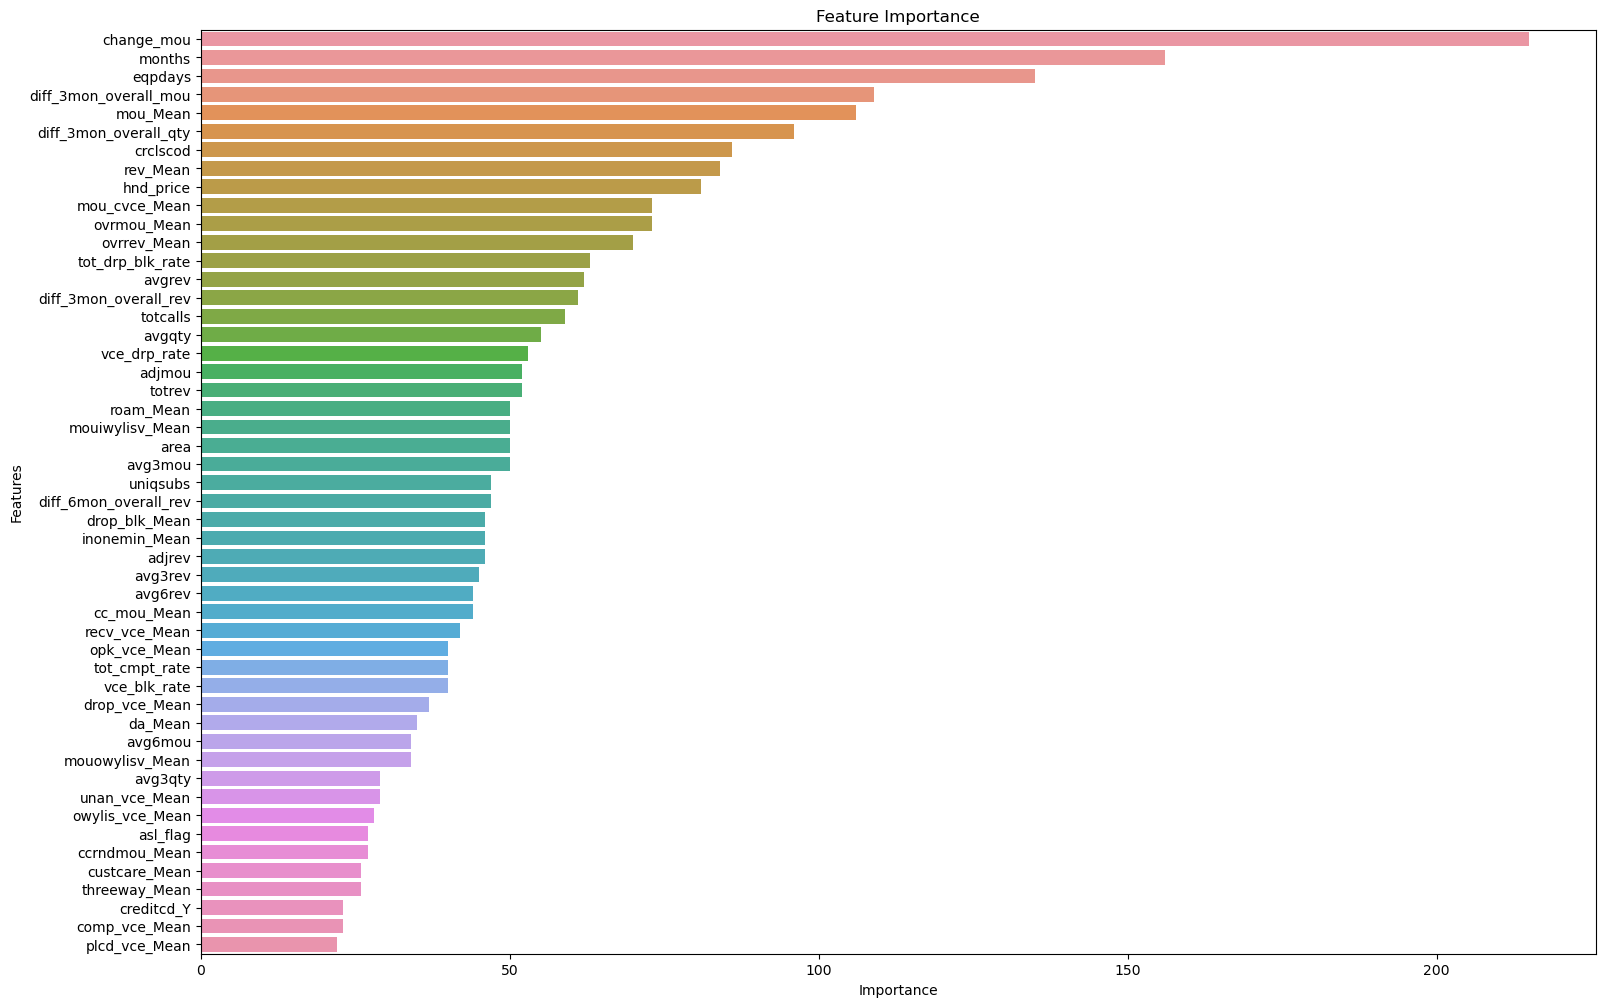

LGBM (CV) Accuracy: 0.6288142857142857
LGBM (CV) Precision: 0.6221815665025426
LGBM (CV) Recall: 0.6337406317458356
LGBM (CV) F1: 0.6278852289029577
LGBM (CV) AUC: 0.6816922510018155


In [82]:
#5 Light Gradient Boosting  (Individual Prediction)
LGBM = LGBMClassifier()
LGBM.fit(X_train_scaled, Y_train)

# Get feature importances
feature_imp = pd.Series(LGBM.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(18, 12))
sns.barplot(x=feature_imp[:50], y=feature_imp[:50].index)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

LGBM_predictions = LGBM.predict(X_test_scaled)
# LGBM (Cross-validation)
LGBM_cv = LGBMClassifier()
scores = cross_validate(LGBM_cv, X_train_scaled, Y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
accuracy_mean = np.mean(scores['test_accuracy'])
precision_mean = np.mean(scores['test_precision'])
recall_mean = np.mean(scores['test_recall'])
f1_mean = np.mean(scores['test_f1'])
auc_mean = np.mean(scores['test_roc_auc'])

print("LGBM (CV) Accuracy:", accuracy_mean)
print("LGBM (CV) Precision:", precision_mean)
print("LGBM (CV) Recall:", recall_mean)
print("LGBM (CV) F1:", f1_mean)
print("LGBM (CV) AUC:", auc_mean)

In [57]:
#6 Xtreme Gradient Boosting (Individual Prediction)
XGB = XGBClassifier()
XGB.fit(X_train_scaled, Y_train)
XGB_predictions = XGB.predict(X_test_scaled)
# XGB (Cross-validation)
XGB_cv = XGBClassifier()
scores = cross_validate(XGB_cv, X_train_scaled, Y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
accuracy_mean = np.mean(scores['test_accuracy'])
precision_mean = np.mean(scores['test_precision'])
recall_mean = np.mean(scores['test_recall'])
f1_mean = np.mean(scores['test_f1'])
auc_mean = np.mean(scores['test_roc_auc'])

print("XGB (CV) Accuracy:", accuracy_mean)
print("XGB (CV) Precision:", precision_mean)
print("XGB (CV) Recall:", recall_mean)
print("XGB (CV) F1:", f1_mean)
print("XGB (CV) AUC:", auc_mean)

XGB (CV) Accuracy: 0.6175285714285714
XGB (CV) Precision: 0.6125831669004673
XGB (CV) Recall: 0.6149215255485343
XGB (CV) F1: 0.6137305105007996
XGB (CV) AUC: 0.6662253259514154


In [58]:
from sklearn.ensemble import AdaBoostClassifier

#7 AdaBoost (Individual Prediction)
adaboost = AdaBoostClassifier(random_state=42)
adaboost.fit(X_train_scaled, Y_train)
adaboost_predictions = adaboost.predict(X_test_scaled)

# AdaBoost (Cross-validation)
adaboost_cv = AdaBoostClassifier(random_state=42)
scores = cross_validate(adaboost_cv, X_train_scaled, Y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
accuracy_mean = np.mean(scores['test_accuracy'])
precision_mean = np.mean(scores['test_precision'])
recall_mean = np.mean(scores['test_recall'])
f1_mean = np.mean(scores['test_f1'])
auc_mean = np.mean(scores['test_roc_auc'])

print("AdaBoost (CV) Accuracy:", accuracy_mean)
print("AdaBoost (CV) Precision:", precision_mean)
print("AdaBoost (CV) Recall:", recall_mean)
print("AdaBoost (CV) F1:", f1_mean)
print("AdaBoost (CV) AUC:", auc_mean)


AdaBoost (CV) Accuracy: 0.6132142857142858
AdaBoost (CV) Precision: 0.6096855560746176
AdaBoost (CV) Recall: 0.6040239385068731
AdaBoost (CV) F1: 0.6068378200819547
AdaBoost (CV) AUC: 0.6585065283611643


In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


#8 Long SHort Term Memory
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train_scaled.shape[1], 1), activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
model.fit(X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1), Y_train, epochs=10, batch_size=32)

# Make predictions using the LSTM model
lstm_predictions = model.predict(X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
lstm_predictions_classes = (lstm_predictions > 0.5).astype(int)

# Calculate metrics for LSTM
lstm_accuracy = accuracy_score(Y_test, lstm_predictions_classes)
lstm_precision = precision_score(Y_test, lstm_predictions_classes)
lstm_recall = recall_score(Y_test, lstm_predictions_classes)
lstm_f1 = f1_score(Y_test, lstm_predictions_classes)
lstm_auc = roc_auc_score(Y_test, lstm_predictions)

print("LSTM Accuracy:", lstm_accuracy)
print("LSTM Precision:", lstm_precision)
print("LSTM Recall:", lstm_recall)
print("LSTM F1:", lstm_f1)
print("LSTM AUC:", lstm_auc)


Epoch 1/10
2188/2188 [==============================] - 167s 74ms/step - loss: 6.3118 - accuracy: 0.5310
Epoch 2/10
2188/2188 [==============================] - 183s 84ms/step - loss: 8.3723 - accuracy: 0.5355
Epoch 3/10
2188/2188 [==============================] - 171s 78ms/step - loss: 0.7420 - accuracy: 0.5384
Epoch 4/10
2188/2188 [==============================] - 182s 83ms/step - loss: 0.6876 - accuracy: 0.5387
Epoch 5/10
2188/2188 [==============================] - 178s 81ms/step - loss: 0.6913 - accuracy: 0.5390
Epoch 6/10
2188/2188 [==============================] - 186s 85ms/step - loss: 0.6872 - accuracy: 0.5396
Epoch 7/10
2188/2188 [==============================] - 182s 83ms/step - loss: 0.6873 - accuracy: 0.5400
Epoch 8/10
2188/2188 [==============================] - 178s 81ms/step - loss: 12.1395 - accuracy: 0.5330
Epoch 9/10
2188/2188 [==============================] - 178s 82ms/step - loss: 0.6884 - accuracy: 0.5365
Epoch 10/10
938/938 [==============================] -

In [67]:
from sklearn.neighbors import KNeighborsClassifier

#9 KNN (Individual Prediction)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, Y_train)
knn_predictions = knn.predict(X_test_scaled)

# KNN (Cross-validation)
knn_cv = KNeighborsClassifier()
scores = cross_validate(knn_cv, X_train_scaled, Y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
accuracy_mean = np.mean(scores['test_accuracy'])
precision_mean = np.mean(scores['test_precision'])
recall_mean = np.mean(scores['test_recall'])
f1_mean = np.mean(scores['test_f1'])
auc_mean = np.mean(scores['test_roc_auc'])

print("KNN (CV) Accuracy:", accuracy_mean)
print("KNN (CV) Precision:", precision_mean)
print("KNN (CV) Recall:", recall_mean)
print("KNN (CV) F1:", f1_mean)
print("KNN (CV) AUC:", auc_mean)


KNN (CV) Accuracy: 0.5488714285714286
KNN (CV) Precision: 0.5458992980494546
KNN (CV) Recall: 0.5183996278583289
KNN (CV) F1: 0.5317832042791116
KNN (CV) AUC: 0.5647984702674677
